In [3]:
import ultralytics
from ultralytics import YOLO
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
import wandb
wandb.init(mode="disabled")
import shutil

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


INFO: pip is looking at multiple versions of sentry-sdk to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of sentry-sdk to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ---------------------------------------- 0.0/203.3 kB ? eta -:--:--
     --------------------- ---------------- 112.6/203.3 kB 3.2 MB/s eta 0:00:01
     -------------------------- ----------- 143.4/203.3 kB 1.7 MB/s eta 0:00:01
     -------------------------------- ----- 174.1/203.3 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 203.3/203.3 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/203.1 kB ? eta 


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
if os.path.exists('dataset'):
    shutil.rmtree('dataset')
shutil.copytree('D:\Datasets/axial_t1wce_2_class', 'dataset')

'dataset'

In [17]:
files = os.listdir('dataset/images/train')
random_file = random.choice(files)
random_file = os.path.splitext(random_file)[0]
print(random_file)

00250_115


(256, 192, 3)


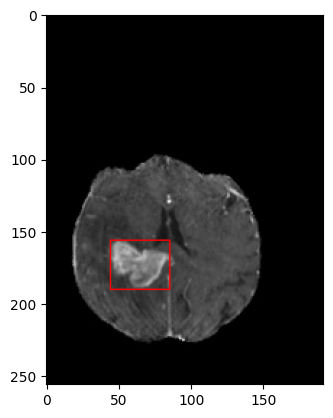

In [18]:
with open(os.path.join('dataset/labels/train', f'{random_file}.txt'),'r') as f:
    labels = f.readlines()
    labels = labels[0].split(' ')
    f.close()

img = cv2.imread(os.path.join('dataset/images/train', f'{random_file}.jpg'), 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

tumor_class, x, y, w, h = int(labels[0]), float(labels[1]), float(labels[2]), float(labels[3]), float(labels[4])
x_pt1 = int((x - w/2) * img.shape[1])
y_pt1 = int((y - h/2) * img.shape[0])
x_pt2 = int((x + w/2) * img.shape[1])
y_pt2 = int((y + h/2) * img.shape[0])

if tumor_class == 1:
    colour = (255, 0, 0)
else:
    colour = (0, 255, 0)
cv2.rectangle(img, (x_pt1, y_pt1), (x_pt2, y_pt2), colour, 1)

print(img.shape)
plt.imshow(img)

In [19]:
train_images = os.listdir('dataset/images/train')
test_images = os.listdir('dataset/images/test')
train_labels = os.listdir('dataset/labels/train')
test_labels = os.listdir('dataset/labels/test')

num_train_images = len(train_images)
num_test_images = len(test_images)
num_train_labels = len(train_labels)
num_test_labels = len(test_labels)

print(num_train_images, num_test_images)
print(num_train_labels, num_test_labels)

310 75
296 75


In [20]:
os.path.splitext(random_file)[0]
unlabelled = set(train_images) - set([os.path.splitext(file)[0] + '.jpg' for file in train_labels])

for image in unlabelled:
    os.remove(os.path.join('dataset/images/train', image))

In [21]:
train_images = os.listdir('dataset/images/train')
test_images = os.listdir('dataset/images/test')
train_labels = os.listdir('dataset/labels/train')
test_labels = os.listdir('dataset/labels/test')

num_train_images = len(train_images)
num_test_images = len(test_images)
num_train_labels = len(train_labels)
num_test_labels = len(test_labels)

print(num_train_images, num_test_images)
print(num_train_labels, num_test_labels)

296 75
296 75


In [22]:
val_split = int(num_train_images * 0.2)
val_images = random.sample(train_images, val_split)

if os.path.exists('dataset/images/val'):
    shutil.rmtree('dataset/images/val')
if os.path.exists('dataset/labels/val'):
    shutil.rmtree('dataset/labels/val')

os.mkdir('./dataset/images/val')
os.mkdir('./dataset/labels/val')

for image in val_images:
    shutil.move(os.path.join('dataset/images/train', image), 'dataset/images/val')

for image in val_images:
    label = os.path.splitext(image)[0] + '.txt'
    shutil.move(os.path.join('dataset/labels/train', label), 'dataset/labels/val')

In [23]:
text = """
path: /kaggle/working/dataset
train: images/train
val: images/val

# Classes
nc: 2
names: ['negative','positive']
"""
with open("./fixed_path.yaml", 'w') as file:
    file.write(text)

In [24]:
model = YOLO('yolov8s.pt')

In [29]:
results = model.train(data='D:/Datasets/axial_t1wce_2_class/axial_t1wce_2_class.yaml', epochs=10)

New https://pypi.org/project/ultralytics/8.1.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.236 🚀 Python-3.11.1 torch-2.1.2+cpu CPU (Intel Core(TM) i5-4310U 2.00GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=D:/Datasets/axial_t1wce_2_class/axial_t1wce_2_class.yaml, epochs=10, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fa

100%|██████████| 755k/755k [00:00<00:00, 4.94MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning D:\Datasets\axial_t1wce_2_class\labels\train... 296 images, 14 backgrounds, 0 corrupt: 100%|██████████| 310/310 [00:00<00:00, 759.02it/s]


train: New cache created: D:\Datasets\axial_t1wce_2_class\labels\train.cache


val: Scanning D:\Datasets\axial_t1wce_2_class\labels\test... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 548.97it/s]

val: New cache created: D:\Datasets\axial_t1wce_2_class\labels\test.cache


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.739      7.353       1.56         15        640:   5%|▌         | 1/20 [01:31<28:59, 91.58s/it]


KeyboardInterrupt: 

In [22]:
print(results)

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a88c74322f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

/kaggle/runs/detect/train


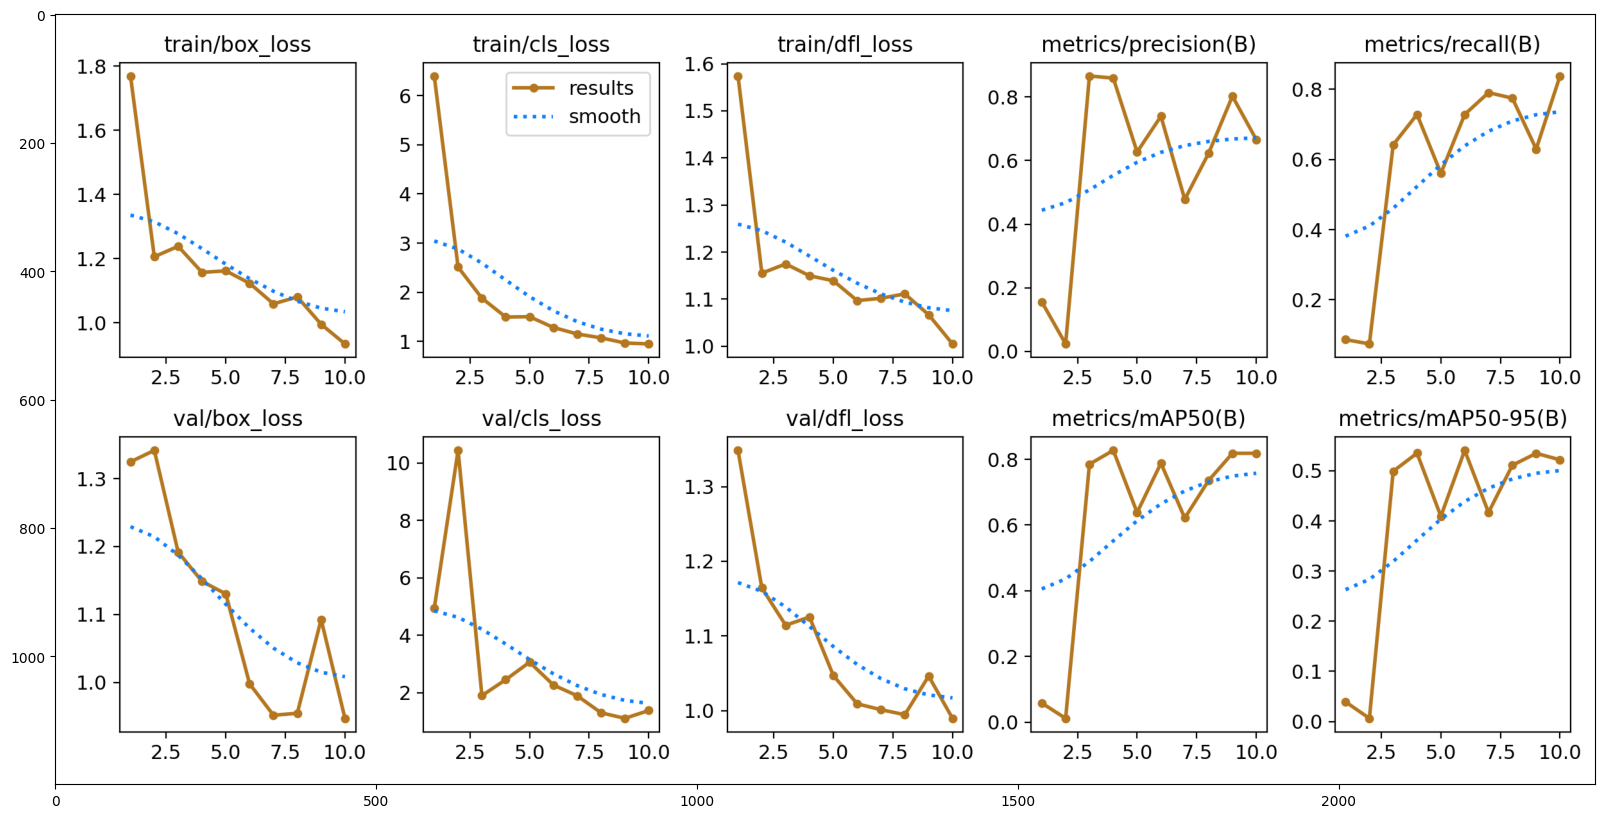

In [26]:
training_save_dir = '/kaggle/' + str(results.save_dir)
print(training_save_dir)

plt.figure(figsize=(20, 10))
img = cv2.imread('/content/gdrive/MyDrive/Kaggle/runs/detect/train/results.png')
plt.imshow(img)
plt.show()

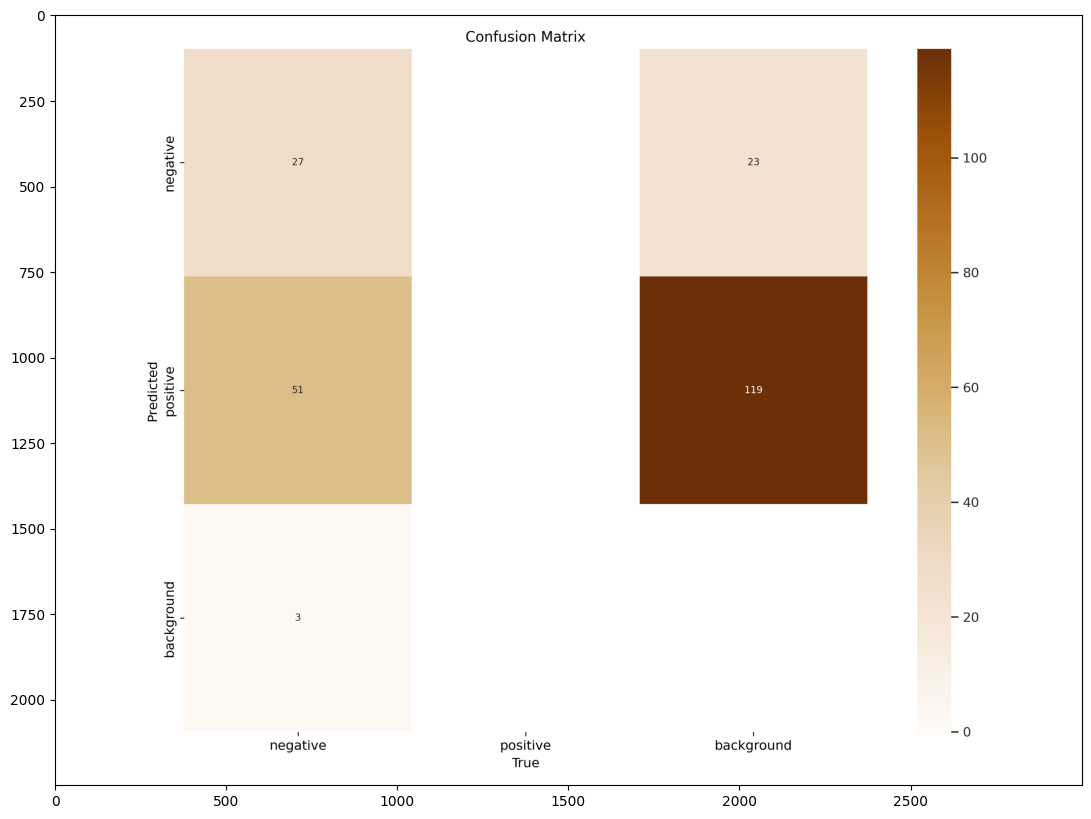

In [28]:
plt.figure(figsize=(20, 10))
img = cv2.imread('/content/gdrive/MyDrive/Kaggle/runs/detect/train/confusion_matrix.png')
plt.imshow(img)
plt.show()

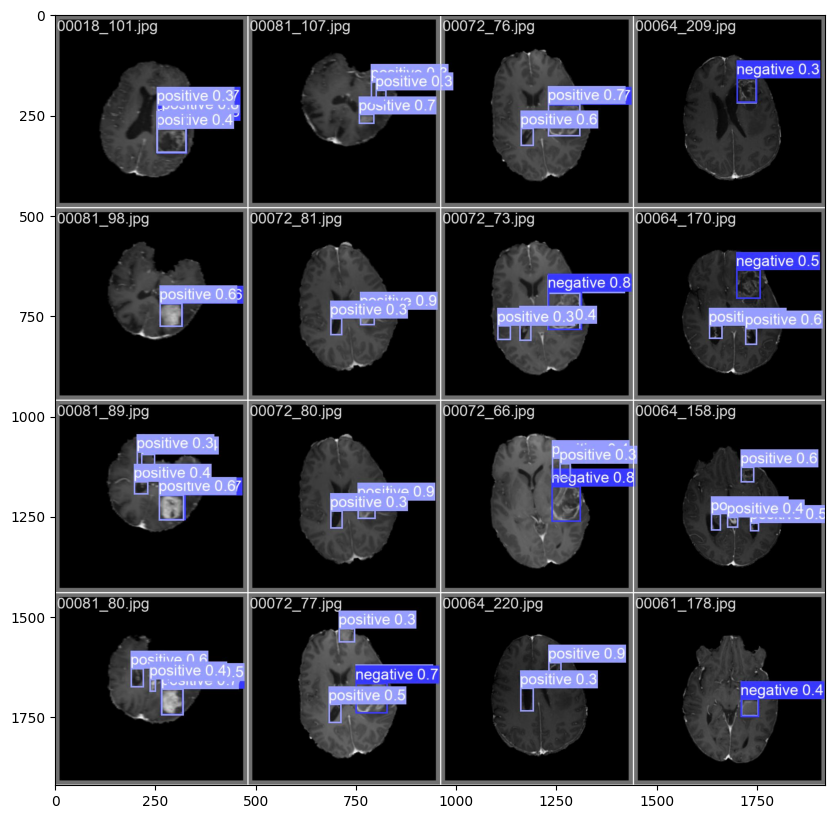

In [30]:
plt.figure(figsize=(20, 10))
img = cv2.imread('/content/gdrive/MyDrive/Kaggle/runs/detect/train/val_batch0_pred.jpg')
plt.imshow(img)
plt.show()

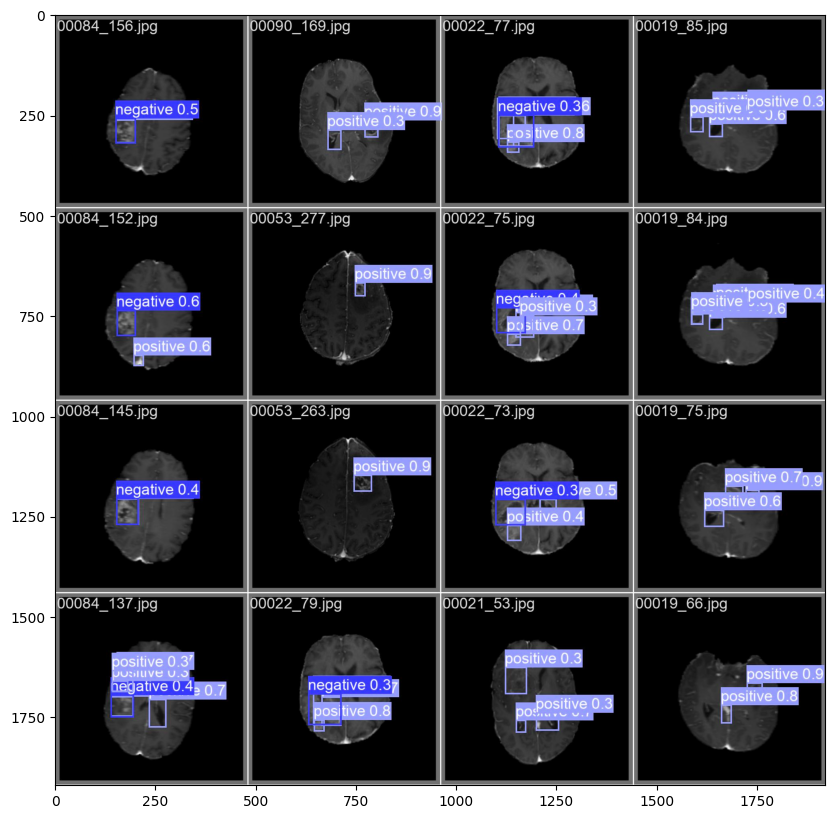

In [32]:
plt.figure(figsize=(20, 10))
img = cv2.imread('/content/gdrive/MyDrive/Kaggle/runs/detect/train/val_batch1_pred.jpg')
plt.imshow(img)
plt.show()

In [35]:
trained_model = YOLO('/content/gdrive/MyDrive/Kaggle/runs/detect/train/weights/best.pt')
predictions = trained_model.predict(
    source="/content/gdrive/MyDrive/Kaggle/contentgdriveMyDriveKaggledataset/axial_t1wce_2_class/images/test",
    conf=0.4, save_txt=True, save_conf=True)


image 1/75 /content/gdrive/MyDrive/Kaggle/contentgdriveMyDriveKaggledataset/axial_t1wce_2_class/images/test/00018_101.jpg: 640x640 1 negative, 1 positive, 16.4ms
image 2/75 /content/gdrive/MyDrive/Kaggle/contentgdriveMyDriveKaggledataset/axial_t1wce_2_class/images/test/00018_109.jpg: 640x640 (no detections), 16.4ms
image 3/75 /content/gdrive/MyDrive/Kaggle/contentgdriveMyDriveKaggledataset/axial_t1wce_2_class/images/test/00018_111.jpg: 640x640 2 positives, 16.3ms
image 4/75 /content/gdrive/MyDrive/Kaggle/contentgdriveMyDriveKaggledataset/axial_t1wce_2_class/images/test/00018_117.jpg: 640x640 (no detections), 16.4ms
image 5/75 /content/gdrive/MyDrive/Kaggle/contentgdriveMyDriveKaggledataset/axial_t1wce_2_class/images/test/00018_121.jpg: 640x640 (no detections), 16.3ms
image 6/75 /content/gdrive/MyDrive/Kaggle/contentgdriveMyDriveKaggledataset/axial_t1wce_2_class/images/test/00018_126.jpg: 640x640 1 negative, 16.3ms
image 7/75 /content/gdrive/MyDrive/Kaggle/contentgdriveMyDriveKaggledat

In [46]:
predictions_save_dir = '/content/gdrive/MyDrive/Kaggle/' + predictions[0].save_dir + '/labels'

In [40]:
def draw_bbox(file_path, filename, img):
    with open(os.path.join(file_path, f'{filename}.txt'),'r') as f:
        labels = f.readlines()
        labels = labels[0].split(' ')
        print(labels)
        f.close()

    tumor_class, x, y, w, h = int(labels[0]), float(labels[1]), float(labels[2]), float(labels[3]), float(labels[4])
    x_pt1 = int((x - w/2) * img.shape[1])
    y_pt1 = int((y - h/2) * img.shape[0])
    x_pt2 = int((x + w/2) * img.shape[1])
    y_pt2 = int((y + h/2) * img.shape[0])

    if tumor_class == 0:
        colour = (255, 0, 0)
        label = 'Negative'
    else:
        colour = (0, 255, 0)
        label = 'Positive'
    if len(labels) > 5:
        prob = float(labels[5])
        prob = round(prob, 1)
        prob = str(prob)
        label = label + ' ' + prob

    cv2.rectangle(img, (x_pt1, y_pt1), (x_pt2, y_pt2), colour, 1)
    cv2.putText(img, label, (x_pt1, y_pt1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, colour, 1)

['0', '0.424776', '0.68004', '0.171519', '0.194909', '0.680471\n']
['0', '0.419014', '0.682512', '0.154930', '0.198357']


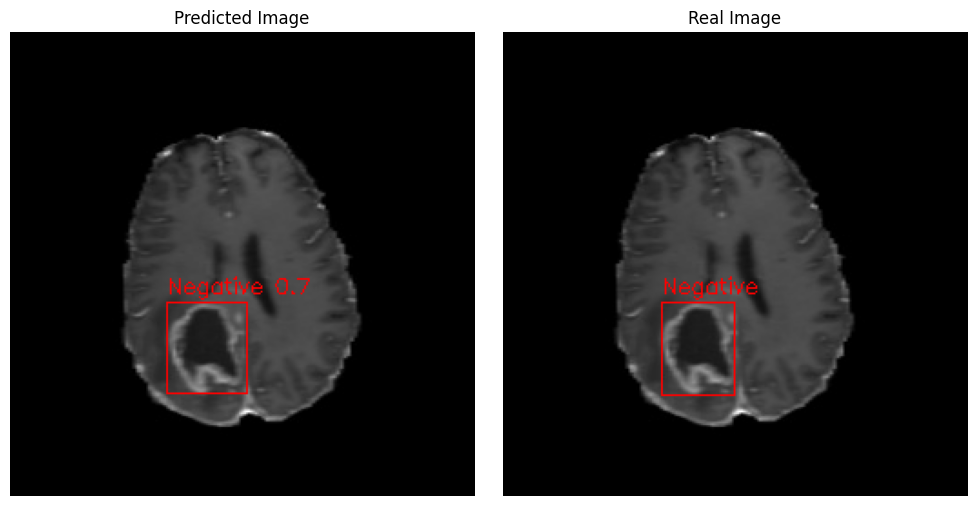

In [49]:
files = os.listdir('/content/gdrive/MyDrive/Kaggle/runs/detect/predict/labels')
random_file = random.choice(files)
random_file = os.path.splitext(random_file)[0]

img_pred = cv2.imread(os.path.join('dataset/images/test', f'{random_file}.jpg'), 1)
img_pred = cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)
draw_bbox(predictions_save_dir, random_file, img_pred)

img_real = cv2.imread(os.path.join('dataset/images/test', f'{random_file}.jpg'), 1)
img_real = cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB)
draw_bbox('dataset/labels/test', random_file, img_real)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_pred)
axes[0].set_title('Predicted Image')
axes[0].axis('off')

axes[1].imshow(img_real)
axes[1].set_title('Real Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()